can use functional network as well

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics, losses, optimizers, activations
from tensorflow.keras.datasets import imdb
import numpy as np

In [0]:
(train_data_r, train_labels_r), (test_data_r, test_labels_r) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data_r[0]])

In [0]:
def vectorize_sequences(sequences, dimension=10000)->np.ndarray:
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data_r).astype(np.float32)
x_test = vectorize_sequences(test_data_r).astype(np.float32)
y_train = np.asarray(train_labels_r).astype(np.float32)
y_test = np.asarray(test_labels_r).astype(np.float32)

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation=activations.relu, input_shape=(10000,)))
model.add(layers.Dense(16, activation=activations.relu))
model.add(layers.Dense(1, activation=activations.sigmoid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.compile(optimizer=optimizers.RMSprop(),loss=losses.binary_crossentropy,metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=1024, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6194 - acc: 0.6905 - val_loss: 0.5383 - val_acc: 0.7472
Epoch 2/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.4807 - acc: 0.8495 - val_loss: 0.4570 - val_acc: 0.8323
Epoch 3/20
15000/15000 [==============================] - 1s 49us/sample - loss: 0.3820 - acc: 0.8985 - val_loss: 0.3908 - val_acc: 0.8758
Epoch 4/20
15000/15000 [==============================] - 1s 51us/sample - loss: 0.3013 - acc: 0.9205 - val_loss: 0.3339 - val_acc: 0.8795
Epoch 5/20
15000/15000 [==============================] - 1s 70us/sample - loss: 0.2442 - acc: 0.9330 - val_loss: 0.3034 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.1983 - acc: 0.9489 - val_loss: 0.3058 - val_acc: 0.8799
Epoch 7/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.1755 - acc: 0.9503 - val_loss: 0.

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
import matplotlib.pyplot as plt

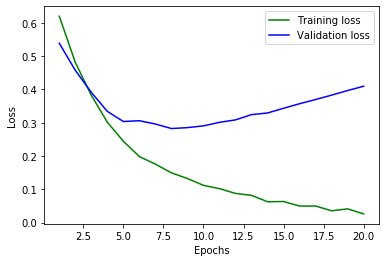

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g-', label='Training loss')
plt.plot(epochs, val_loss_values, 'b-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

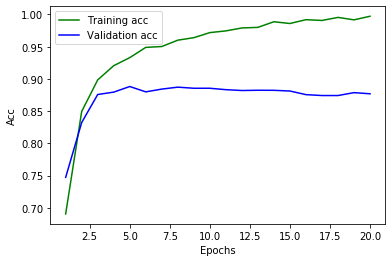

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g-', label='Training acc')
plt.plot(epochs, val_acc_values, 'b-', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [0]:
(train_data_rt, train_labels_rt), (test_data_rt, test_labels_rt) = reuters.load_data(
    num_words = 10000)
x_train_rt = vectorize_sequences(train_data_rt)
x_test_rt = vectorize_sequences(test_data_rt)
y_train_rt = to_categorical(train_labels_rt)
y_test_rt = to_categorical(test_labels_rt)

In [0]:
model_rt = models.Sequential()
model_rt.add(layers.Dense(64, activation=activations.relu, input_shape=(10000,)))
model_rt.add(layers.Dense(64,activation=activations.relu))
model_rt.add(layers.Dense(46,activation=activations.softmax))

In [0]:
model_rt.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy])

In [16]:
x_val_rt = x_train_rt[:1000]
y_val_rt = y_train_rt[:1000]
partial_x_train_rt = x_train_rt[1000:]
partial_y_train_rt = y_train_rt[1000:]
x_val_rt.shape

(1000, 10000)

In [17]:
history_rt = model_rt.fit(partial_x_train_rt, partial_y_train_rt, 
                          epochs=9, batch_size=512, 
                          validation_data=(x_val_rt,y_val_rt))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 96us/sample - loss: 2.5576 - categorical_accuracy: 0.5233 - val_loss: 1.6895 - val_categorical_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 78us/sample - loss: 1.4090 - categorical_accuracy: 0.6963 - val_loss: 1.3050 - val_categorical_accuracy: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s 77us/sample - loss: 1.0665 - categorical_accuracy: 0.7662 - val_loss: 1.1358 - val_categorical_accuracy: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 77us/sample - loss: 0.8399 - categorical_accuracy: 0.8224 - val_loss: 1.0428 - val_categorical_accuracy: 0.7750
Epoch 5/9
7982/7982 [==============================] - 1s 76us/sample - loss: 0.6733 - categorical_accuracy: 0.8562 - val_loss: 0.9594 - val_categorical_accuracy: 0.8090
Epoch 6/9
7982/7982 [==============================] - 1s 77us/sample - loss: 0.5408 - categorical_acc

In [18]:
results = model_rt.evaluate(x_test_rt, y_test_rt)
results

2246/2246 [==============================] - 0s 127us/sample - loss: 1.0029 - categorical_accuracy: 0.7809


[1.0029081886406999, 0.7809439]

In [19]:
import copy
test_labels_rt_copy = copy.copy(test_labels_rt)
np.random.shuffle(test_labels_rt_copy)
hits_array = np.array(test_labels_rt) == np.array(test_labels_rt_copy)
float(np.sum(hits_array))/len(test_labels_rt)

0.19545859305431879

In [20]:
predictions_rt = model_rt.predict(x_test)
prediction_labels_rt = np.argmax(predictions_rt, axis=1)
prediction_labels_rt

array([19,  4,  3, ...,  4,  3,  3])

In [0]:
from tensorflow.keras.datasets import boston_housing
(train_data_bh, train_targets_bh),(test_data_bh, test_targets_bh) = boston_housing.load_data()

In [22]:
print(train_data_bh.shape)
print(train_targets_bh.shape)

(404, 13)
(404,)


In [0]:
def norm(dataset: np.ndarray) -> np.ndarray:
  mean = np.mean(dataset, axis=0)
  std = np.std(dataset, axis=0)
  return (dataset - mean)/std

In [0]:
train_data_bh = norm(train_data_bh)
test_data_bh = norm(test_data_bh)

In [0]:
def build_model_bh():
  model = models.Sequential()
  model.add(layers.Dense(64, activation=activations.relu, input_shape=(train_data_bh.shape[1],)))
  model.add(layers.Dense(64, activation=activations.relu))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizers.RMSprop(),loss=losses.mse, metrics=[metrics.mae])
  return model

In [26]:
k = 4
num_val_samples = len(train_data_bh)//k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f'processing fold #{i}')
  val_data = train_data_bh[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets_bh[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [
        train_data_bh[:i*num_val_samples],
        train_data_bh[(i+1)*num_val_samples:]
      ],
      axis=0
  )
  partial_train_targets = np.concatenate(
      [
        train_targets_bh[:i*num_val_samples],
        train_targets_bh[(i+1)*num_val_samples:]
      ],
      axis=0
  )
  model = build_model_bh()
  history = model.fit(partial_train_data,partial_train_targets,
                      validation_data = (val_data,val_targets),
                      epochs=num_epochs, batch_size=1024, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [0]:
from typing import List
def smooth_curve(points, factor=0.9) -> List[float]:
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

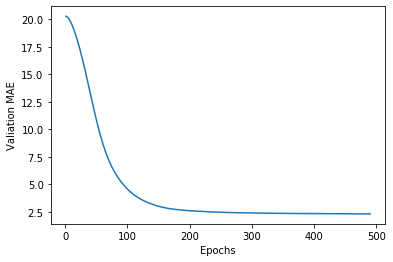

In [29]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Valiation MAE')
plt.show()

above use large batch, not overfit

In [30]:
model_bh = build_model_bh()
model_bh.fit(train_data_bh, train_targets_bh, epochs=500, batch_size=1024, verbose=0)
test_mse_score, test_mae_score = model_bh.evaluate(test_data_bh, test_targets_bh)
test_mae_score

102/102 [==============================] - 0s 664us/sample - loss: 15.5572 - mean_absolute_error: 2.5979


2.5979278